In [1]:
##All my imports

import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.model_selection import GridSearchCV

In [2]:
##Initialisation
df = pd.read_csv('./us_books.csv')


names = ['listingIsTopRated','sellerFeedbackScore','sellerPositivePercent','sellerIsTopRated','endAtWeekend','endAtEvening','length','isBroken','isUsed','isSet','freeShipping']

x = df[names]
y = df['isSold']

In [3]:
##Test and Train split
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [4]:
##Optimising the parameters for the SVM model
def optimise():
    param_grid = {

        'model__gamma':[0.001, 0.01],
        'model__C':[0.25,1,5],
        'model__kernel': ['linear', 'rbf', 'poly']
    }

    model = SVC()
    steps = [('model', model)]

    pipeline = Pipeline(steps)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    search = GridSearchCV(pipeline, param_grid, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    search.fit(df[names],df['isSold'])

    print(f'Best score is {search.best_score_}')
    print(f'Best Params are {search.best_params_}')


The accuracy is 0.8734177215189873


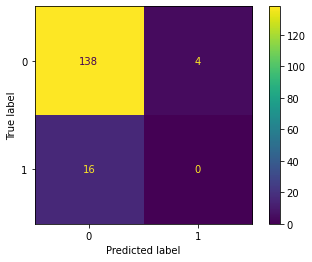

In [5]:
#A single attmept of SVM model. Should have the idea results plugged in here.

clf = SVC(kernel='rbf', C=2.5, gamma=0.001)
model = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print(f'The accuracy is {acc}')

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()


In [7]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, x_test, y_test, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{x.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

In [8]:
r

{'importances_mean': array([ 0.        , -0.00654008, -0.00126582,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]),
 'importances_std': array([0.        , 0.00887331, 0.00253165, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'importances': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        , -0.01265823,  0.        , -0.01265823,  0.        ,
          0.        ,  0.        ,  0.        , -0.01265823,  0.        ,
         -0.01265823, -0.0